In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from qutip import *

### Simulation Settings + Define Operators

In [19]:
# Highest Fock state
nMax = 100

# QuTip integration settings
options = Options()
options.num_cpus = 5
options.nsteps = 100000

# Define Operators
a = tensor(qeye(2), qeye(2), destroy(nMax))
sM_1 = tensor(destroy(2), qeye(2), qeye(nMax))
sM_2 = tensor(qeye(2), destroy(2), qeye(nMax))

# Define Hamiltonians
bsb_1 = a.dag() * sM_1.dag()
bsb_1p = a * sM_1
omega_1 = 1

bsb_2 = a.dag() * sM_2.dag()
bsb_2p = a * sM_2
omega_2 = 3/4

bsb = [omega_1 * bsb_1, omega_1 * bsb_1p, omega_2 * bsb_2, omega_2 * bsb_2p]

Text(0, 0.5, 'Occupation probability')

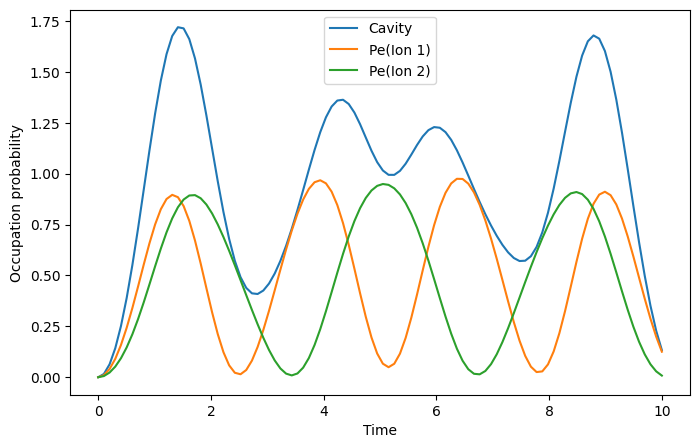

In [20]:
# Initial States
q_1 = basis(2, 0)
q_2 = basis(2, 0)
m = basis(nMax, 0)

rho0 = tensor(q_1, q_2, m)

# Evolve
tlist = np.linspace(0, 10, 100)
output = mesolve(H = bsb, rho0 = rho0, tlist = tlist, options = options, e_ops = [a.dag() * a, sM_1.dag() * sM_1, sM_2.dag() * sM_2])

# Evaluate
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(tlist, output.expect[0], label="Cavity")
ax.plot(tlist, output.expect[1], label="Pe(Ion 1)")
ax.plot(tlist, output.expect[2], label="Pe(Ion 2)")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Occupation probability")
